# Exploratory Data Analysis

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Darvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


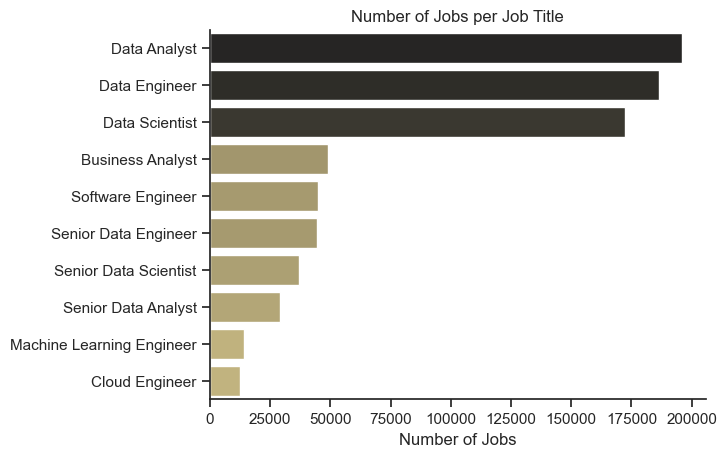

In [3]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:y_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

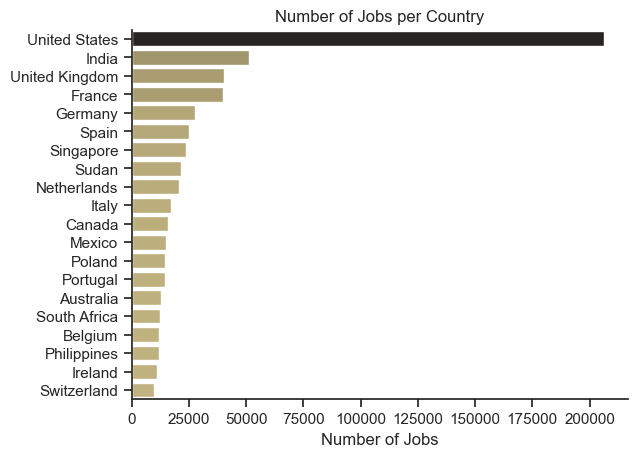

In [4]:
# Countries to Explore

df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:y_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

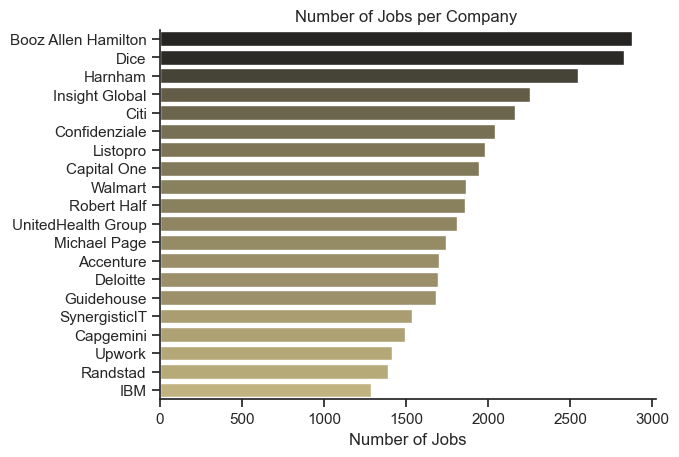

In [50]:
#Companies to Explore

df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:y_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company ')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

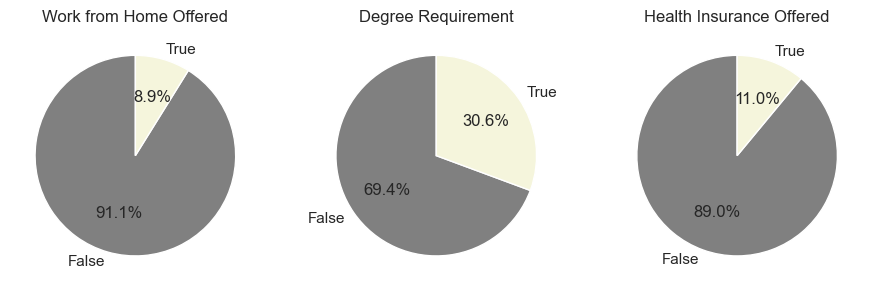

In [35]:
# Job Opportunities
import matplotlib.pyplot as plt

# Define the custom colors for the pie charts
colors = ['Grey', 'beige']  

# Job Opportunities
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90, colors=colors)
    ax[i].set_title(title)

plt.show()


In [30]:
# Filter for India Data Analyst roles

df_DA_IN = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]

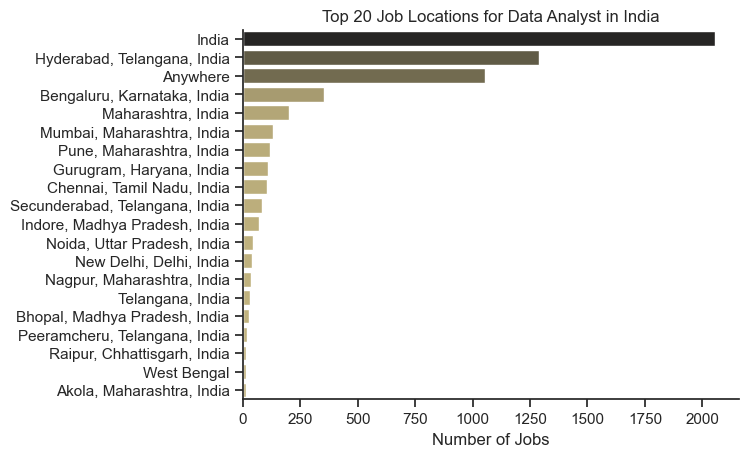

In [49]:
#Locations to Explore in India
df_plot = df_DA_IN['job_location'].value_counts().head(20).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:y_r', legend=False)
sns.despine()
plt.title('Top 20 Job Locations for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

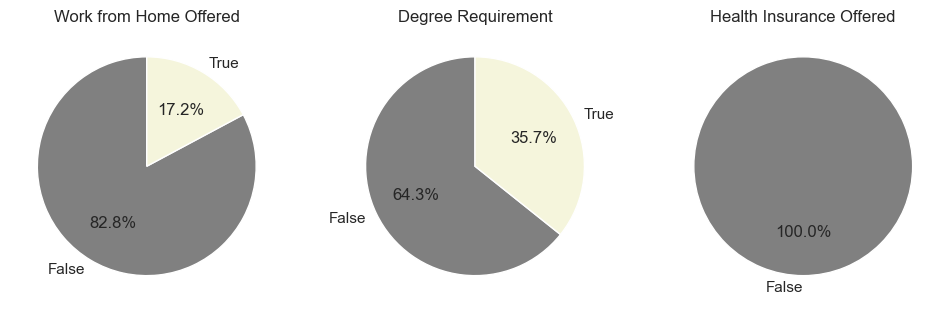

In [43]:
# Job Opportunities in India
import matplotlib.pyplot as plt

# Define the custom colors for the pie charts
colors = ['Grey', 'beige']

# Job Opportunities
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    values = df_DA_IN[column].value_counts()
    labels = values.index.astype(str)  # Convert the index to string labels
    ax[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    ax[i].set_title(title)

plt.show()


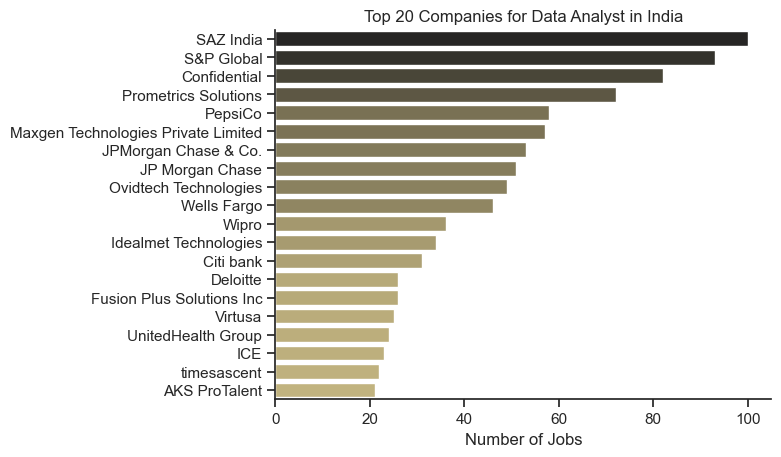

In [47]:
# Companies to Explore:

df_plot = df_DA_IN['company_name'].value_counts().head(20).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:y_r', legend=False)
sns.despine()
plt.title('Top 20 Companies for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()